## Credit card fraud detection analysis and prediction.
Reproducing kaggle kernel by joparga3

In [1]:
from __future__ import print_function, division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Load the dataset

In [2]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In the above table if we look at the class mean it's 0.0017 which suggests that the target is highly imbalanced. The same becomes clear from the graph below too.

Text(0,0.5,u'Frequency')

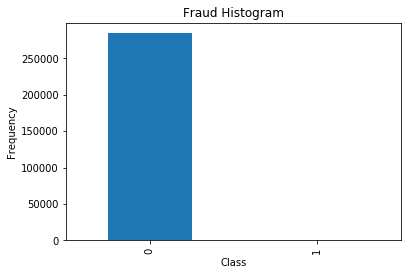

In [4]:
class_count = data["Class"].value_counts(sort=True).sort_index()
class_count.plot(kind="bar")
plt.title("Fraud Histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

Now, the question is how we deal with this unbalanced data. Here, accuracy score won't be a good measure to evaluate our model. We would ofcourse get high accuracy but all the 1's would be classified as 0's (majority class) which is undesirable.

There are several ways to deal with the unbalanced data.
* Collect more data. However, this is not applicable in this case.
* Change the performance metric:
    * Use the confusion matrix to calculate precision and recall.
    * F1 score (harmonic mean/weighted average of precision and recall).
    * ROC curves, AUC score.
    * Precision-Recall AUC score.
* Resampling the data set:
    * This essentially resamples the data to have approximately 50/50 ratio.
    * One way to achieve this is by oversampling the data. This is essentially adding more copies of the undersampled data (better when we have less amount data).
    * Another would be to undersample the data, which is nothing but getting rid of a few instances of majority class (works when lots of data).

In [5]:
# Let's normalize the amount column. It is not in line with the other given features.
from sklearn.preprocessing import StandardScaler
data["normAmount"] = StandardScaler().fit_transform(data["Amount"].reshape(-1,1))
data = data.drop(["Amount","Time"], axis=1)
data.head()

/home/shreeranga/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


#### Resampling Techniques

* As said earlier, there are several resampling techniques. There's another very popular resampling method called SMOTE (Syntheric Minortiy Oversampling Technique). We'll not go through that in this notebook. Maybe in the future. We'll stick with under sampling.
* We'll undersample data to have 50/50 ratio. This will be done by randomly selecting "x" number of samples from the majority class, where "x" is the taotal number of samples in the minority class. 

In [6]:
X = data.loc[:, data.columns != "Class"]
y = data.loc[:, data.columns == "Class"]

In [7]:
# Number of data points in the minority class
number_records_fraud = len(data[data["Class"] == 1])
fraud_indices = np.array(data[data["Class"] == 1].index)

# Picking the indices of the normal class
normal_indices = data[data["Class"] == 0].index

# Out of the picked normal class indices pick "x" (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace=False)
random_normal_indices = np.array(random_normal_indices)

# Appending the two indices
under_sample_indices = np.concatenate([fraud_indices, random_normal_indices])

# under-sampled data set
under_sample_data = data.iloc[under_sample_indices, :]

X_undersample = under_sample_data.loc[:, under_sample_data.columns != "Class"]
y_undersample = under_sample_data.loc[:, under_sample_data.columns == "Class"]

#ratios
print (len(under_sample_data[under_sample_data["Class"] == 0]))
print (len(under_sample_data))

492
984


Splitting data into train and test set. CV to calculate accuracies.

In [8]:
from sklearn.model_selection import train_test_split

# the original data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

# undersampled_data
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample, y_undersample, test_size=0.3, random_state=0)
print("")
print("Number transactions train dataset: ", len(X_train_undersample))
print("Number transactions test dataset: ", len(X_test_undersample))
print("Total number of transactions: ", len(X_train_undersample)+len(X_test_undersample))

Number transactions train dataset:  199364
Number transactions test dataset:  85443
Total number of transactions:  284807

Number transactions train dataset:  688
Number transactions test dataset:  296
Total number of transactions:  984


### Logistic Regression on undersampled data
Some model evaluation terminologies:
* Accuracy = (TP+TN)/total
* Precision = TP/(TP+FP)
* Recall = TP/(TP+FN)
    * TP : True Positives
    * FP : False Positives
    * TN : True Negatives
    * FN : False Negatives

We know that due to imbalanced nature of the data set, many observations could be predicted as FN's. This means a fraudulent transaction is predicted as a normal one. This is not desirable and Recall captures this.
* Trying to increase the recall will decrease the precision. However, in our case if we predict the transaction to fraudulent but it turns out its not then it is not a big deal. 
* We could even apply cost function when having FP and FN with different weights for each type of error but that is for another day.

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

In [10]:
# an ad-hoc function to print K_Fold scores.
def printing_Kfold_scores(x_train_data, y_train_data):
    kf = KFold(n_splits=5, shuffle=False)
    kf.get_n_splits(x_train_data)
    
    # different C parameters?
    c_param_range = [0.01,0.1,1,10,100]
    
    results_table = pd.DataFrame(index=range(len(c_param_range), 2), columns=["C_parameter", "Mean recall score"])
    results_table["C_parameter"] = c_param_range
    
    # k-fold gives us two lists: train_indices = indices[0], test_indices = indices[1]
    j = 0
    for c_param in c_param_range:
        print("-------------------------------------------")
        print("C_parameter: ", c_param)
        print("-------------------------------------------")
        print('')
        
        recall_accs = []
        for train_index, test_index in kf.split(x_train_data):
            
            # call logistic regression with a certain C-parameter
            lr = LogisticRegression(C=c_param, penalty="l1")
            
            # use the training data to fit the model. Use the portion of fold to train model with 
            # train_index. We then predict on the portions assigned as the 'test CV with test_index.
            lr.fit(x_train_data.iloc[train_index,:], y_train_data.iloc[train_index,:].values.ravel())
            
            # predict the values using the test indices in the training data
            y_pred_undersampled = lr.predict(x_train_data.iloc[test_index, :].values)
            
            # calculate the recall scores and append it to a list for recall scores represnting 
            # the current c_parameter
            recall_acc = recall_score(y_train_data.iloc[test_index, :].values, y_pred_undersampled)
            recall_accs.append(recall_acc)
            
            # we are interested in the mean value of recall scores and that is the metric we wanna save
        results_table.loc[j, 'Mean Recall Score'] = np.mean(recall_accs)
        j+=1
        print('')
        print("Mean Recall Score", np.mean(recall_accs))
        print('')
            
    best_c = results_table.loc[results_table["Mean Recall Score"].idxmax()]["C_parameter"]
            
    # Finally, we can check which c_parameter is best among the chosen
    print("***********************************************************************************")
    print("Best model to choose from CV is with C parameter = ", best_c)
            
    return best_c

In [11]:
best_c = printing_Kfold_scores(X_train_undersample, y_train_undersample)

-------------------------------------------
C_parameter:  0.01
-------------------------------------------


Mean Recall Score 0.963585877285

-------------------------------------------
C_parameter:  0.1
-------------------------------------------


Mean Recall Score 0.890753942832

-------------------------------------------
C_parameter:  1
-------------------------------------------


Mean Recall Score 0.91217291547

-------------------------------------------
C_parameter:  10
-------------------------------------------


Mean Recall Score 0.912209938795

-------------------------------------------
C_parameter:  100
-------------------------------------------


Mean Recall Score 0.918302472006

***********************************************************************************
Best model to choose from CV is with C parameter =  0.01


In [12]:
# Create a function to plot confusion matrix
import itertools

def plot_confusion_matrix(cm, classes, 
                         normalize=False,
                         title="Confusion Matrix",
                         cmap=plt.cm.Blues):
    """
    This function prints and plots confusion matrix.
    Normalization can be applied by setting Normalize="True"
    """
    
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")

### prediction on test and plotting the confusion matrix

Recall metric in the testing dataset:  0.931972789116


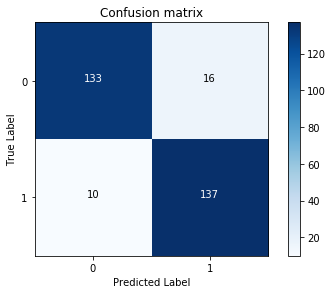

In [13]:
# use the best c_parameter we obtained from CV and build the final model on the undersampled
# data set and predict the model in the test set.
lr = LogisticRegression(C=best_c, penalty="l1")
lr.fit(X_train_undersample, y_train_undersample.values.ravel())
y_pred_undersample = lr.predict(X_test_undersample.values)

# compute confusion matrix
cnf_matrix = confusion_matrix(y_test_undersample, y_pred_undersample)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# plot normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix,
                     classes=class_names,
                     title="Confusion matrix")
plt.show()

So, the model is giving us a 93.2% recall accuracy on the test data set. However, this accuracy is on the undersampled data set.

Now, let's apply our model to the whole data set

Recall metric in the testing dataset:  0.925170068027


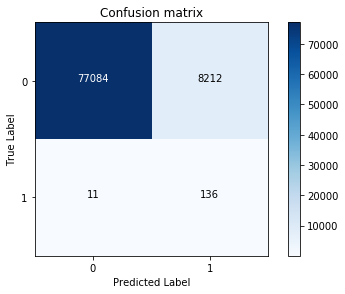

Out of 147 , 11 ,were misclassified.


/home/shreeranga/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [25]:
# use best_c to build the final model using undersampled data set but test it on the original test set
lr = LogisticRegression(C=best_c, penalty="l1")
lr.fit(X_train_undersample, y_train_undersample.values.ravel())
y_pred = lr.predict(X_test.values)

# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()
print("Out of", len(y_test[y["Class"]==1]), ",", cnf_matrix[1,0], ",were misclassified.")

A decent recall accuracy of 92.51 % when tested on the original test data set (skewed version)

### Plotting ROC and Precision-Recall curve.

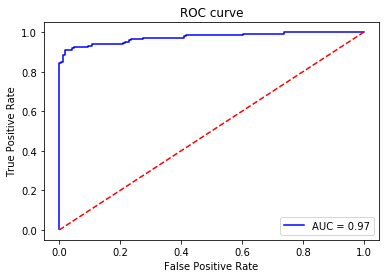

In [31]:
# ROC curve
lr = LogisticRegression(C=best_c, penalty="l1")
y_pred_undersample_score = lr.fit(X_train_undersample, y_train_undersample.values.ravel()).decision_function(X_test_undersample.values)

fpr, tpr, thresholds = roc_curve(y_test_undersample.values.ravel(), y_pred_undersample_score)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.title("ROC curve")
plt.plot(fpr, tpr, "b", label="AUC = %0.2f"% roc_auc)
plt.plot([0,1],[0,1],"r--")
plt.legend(loc='lower right')
# plt.xlim([-1.0, 1.0])
# plt.ylim([-1.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

### Logistic regression classifier on the skewed data. The original data.

In [32]:
best_c = printing_Kfold_scores(X_train, y_train)

-------------------------------------------
C_parameter:  0.01
-------------------------------------------


Mean Recall Score 0.559568228405

-------------------------------------------
C_parameter:  0.1
-------------------------------------------


Mean Recall Score 0.595310250644

-------------------------------------------
C_parameter:  1
-------------------------------------------


Mean Recall Score 0.612645688837

-------------------------------------------
C_parameter:  10
-------------------------------------------


Mean Recall Score 0.61847902217

-------------------------------------------
C_parameter:  100
-------------------------------------------


Mean Recall Score 0.61847902217

***********************************************************************************
Best model to choose from CV is with C parameter =  10.0


Recall metric in the testing dataset:  0.619047619048


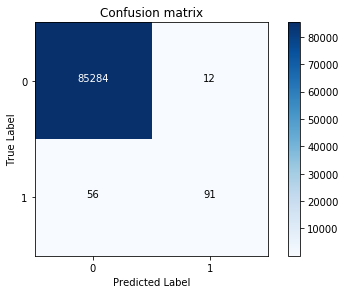

Out of 147 , 56 ,were misclassified.


/home/shreeranga/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [33]:
# use the best C parameter to build the final model on the hole data set and predict the 
# classes in the test set.
lr = LogisticRegression(C=best_c, penalty="l1")
lr.fit(X_train, y_train.values.ravel())
y_pred = lr.predict(X_test.values)

# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()
print("Out of", len(y_test[y["Class"]==1]), ",", cnf_matrix[1,0], ",were misclassified.")

### Changing classification threshold

It can be seen that undersampling the data does a much better job predicting the fraud. We shall see how to change the classification threshold to tweak our final classification results.
* We previously used predict method to predict if an instance belongs to class "0" or "1".
* There is another method "predict_proba()"
    * This method returns probability for each class. The idea is that changing the threshold to assign a record to class 1, we can control precision and recall.

**Let's check this for the undersampled data (best_c = 0.01)**

Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  0.993197278912
Recall metric in the testing dataset:  0.931972789116
Recall metric in the testing dataset:  0.884353741497
Recall metric in the testing dataset:  0.829931972789
Recall metric in the testing dataset:  0.748299319728
Recall metric in the testing dataset:  0.585034013605


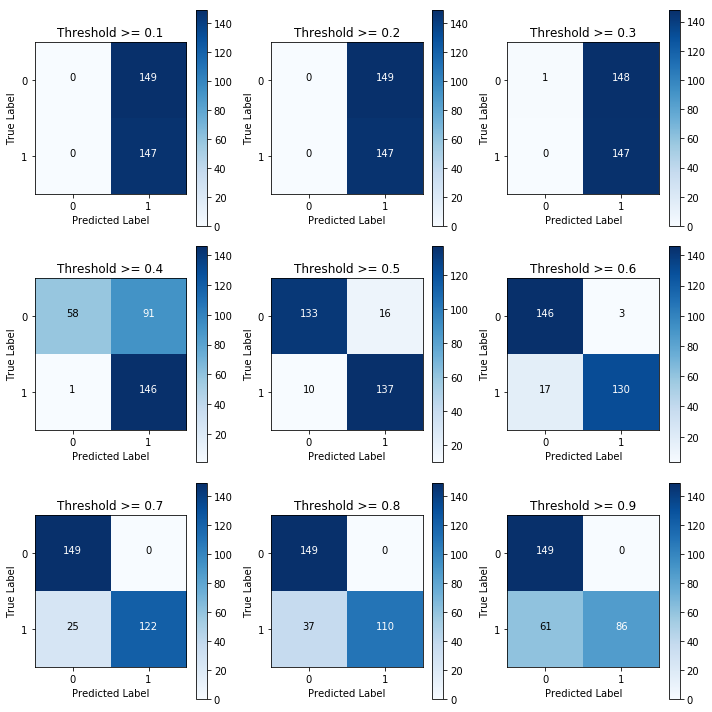

In [35]:
lr = LogisticRegression(C=0.01, penalty="l1")
lr.fit(X_train_undersample, y_train_undersample.values.ravel())
y_pred_undersample_proba = lr.predict_proba(X_test_undersample.values)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))

j = 1

for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i
    
    plt.subplot(3,3,j)
    j +=1
    
    # compute confusion matrix
    cnf_matrix = confusion_matrix(y_test_undersample, y_test_predictions_high_recall)
    np.set_printoptions(precision=2)
    
    print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
    
    # plot normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix, 
                         classes=class_names,
                         title="Threshold >= %s"%i)
    

From the above plots, the pattern is very clear: the more we lower the probability to put a certain instance in the "1" category, more records will be put in that bucket.

This implies that an increase in recall (we want all 1's) but at the same time decrease in precision (we missclassify many other class).

And hence, although recall is our goal metric (don't miss a fraud transaction), we also want to keep the model being accurate as a whole.

### Investigationg precision-recall curve and area under the curve

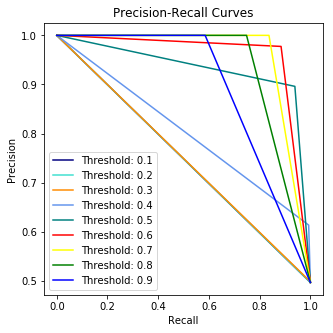

In [40]:
from itertools import cycle

# we are doing this for undersampled dataset. Hence we choose the value of C=0.01
lr = LogisticRegression(C=0.01, penalty="l1")
lr.fit(X_train_undersample, y_train_undersample.values.ravel())
y_pred_undersample_proba = lr.predict_proba(X_test_undersample.values)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'blue','black'])
               
plt.figure(figsize=(5,5))

j=1

for i, color in zip(thresholds, colors):
    y_test_predictions_prob = y_pred_undersample_proba[:, 1] > i
    
    precision, recall, thresholds = precision_recall_curve(y_test_undersample, y_test_predictions_prob)
    
    # Plot Precision-recall curve
    plt.plot(recall, precision, color=color,
            label="Threshold: %s"%i)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curves")
    plt.legend(loc="lower left")